##⚽️**Goal of Project(다음분기 어떤 게임을 설계해야할까?)🥅**

> 최대한 배경지식이 없는 사람도 이해할 수 있도록 발표

###**Keywords(참조용)**
- Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
- Sprint 2 : Hypothesis Test, CI, Bayesian
- Sprint 3 : DR, PCA, Cluster

-----------------------------------------
###**반드시 들어가야 하는 내용**
1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3. 매출이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
4. 개인적인 분석 목표 +

-----------------------------------------
###**기타**

- 발표영상시간은 5분
- 코드에 커멘트 달아주는 것이 좋다.

----------------------------------------
###**발표준비**

####**1) 발표 슬라이드**
>- 생각하는 문제(풀었으면 좋겠다)제시
- 가설 및 사용한 데이터에 대한 설명
- 결과 및 결론

**알맞은 문제 제시와 해결하기 위한 유용한 방법 및 결과를 설명.**

####**2) 발표 스크립트**
> - 슬라이드를 설명하는 영상을 만들기 위해 스크립트 작성.
- 실제로 말을 하듯 자연스럽게 작성하기.

**누구나 알아들을 수 있는 문장으로 작성할 것, 나의 의견이 충분히 상대방을 설득할 수 있도록 작성할 것**

####**3) 발표 영상**
> - Zoom을 통해 5분 이내 영상을 녹화
- 리허설과 연습.

**미리 영상을 찍어서 확인작업을 거치자, 퇴고를 반복해 좀더 나은 영상으로 만들자, 주변에 피드백을 받아보는 것도 좋은 방법이 될듯하다.**




데이터

- 1980년 ~ 2020년까지 장르, 유통사별 게임시장 판매량 자료를 대상으로 분석.

-----------------------------------------
데이터 전처리(Preprocessing)

- 데이터 정보 확인
- Data Description
- 세계 판매량을 계산해 데이터 추가
- 수치형, 번주형 자료 분리
- 결측치 분석
- 연도(Year) 

-----------------------------------------------
##**목차** :

1. 데이터 불러오기
2. 전체 통계량
3. 지역에 따른 선호장르
4. 연도별 매출 트랜드
5. 매출이 높은 게임 분석
6. 어떤 배급사가 매출이 높은가?
7. 장르와 플렛폼

![](https://steamuserimages-a.akamaihd.net/ugc/872998007403747600/A61AD4F77F4D34742ED479CC08D241466255E35A/)

In [ ]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.3)


In [ ]:
import numpy as np 
import pandas as pd

%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt   
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import scipy.stats as st
import math
from sklearn.preprocessing import StandardScaler
from scipy import stats

### **1. 데이터 불러오기**

In [ ]:
# Pandas를 통해 데이터를 불러 옵니다.
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
data = pd.read_csv(url, index_col = [0])

In [ ]:
# 데이터의 정보를 확인.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


데이터셋의 총 60개의 행을 살펴봅니다.

In [ ]:
data.head(60)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [ ]:
# 연도별 정렬을 통해 결과값 확인
data.sort_values(by = 'Year')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9277,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0,0,0.2,0
16395,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0
14667,Strider 2,PS,0.0,Platform,Virgin Interactive,0.05,0.03,0,0.01
2250,SplashDown,PS2,1.0,Racing,Atari,0.34,0.27,0,0.09
8682,NCAA Football 2002,PS2,1.0,Sports,Electronic Arts,0.77,0.6,0,0.2
...,...,...,...,...,...,...,...,...,...
16241,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16276,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16279,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


현재 각 지역 판매량 부분이 object 타입으로 float 타입으로 변환이 필요합니다.

또한 총16598 개의 행이 존재하나 Year, Genre, Publisher의 열에서는 결측치가 존재합니다.

####**결측값 처리**

In [ ]:
# 결측치의 갯수확인.
data.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# Year 1.63% , Genre 0.30%, Publisher 0.34% 결측치가 존재
(data.isna().sum() * 100) / data.shape[0]

Name           0.000000
Platform       0.000000
Year           1.632727
Genre          0.301241
Publisher      0.349440
NA_Sales       0.000000
EU_Sales       0.000000
JP_Sales       0.000000
Other_Sales    0.000000
dtype: float64

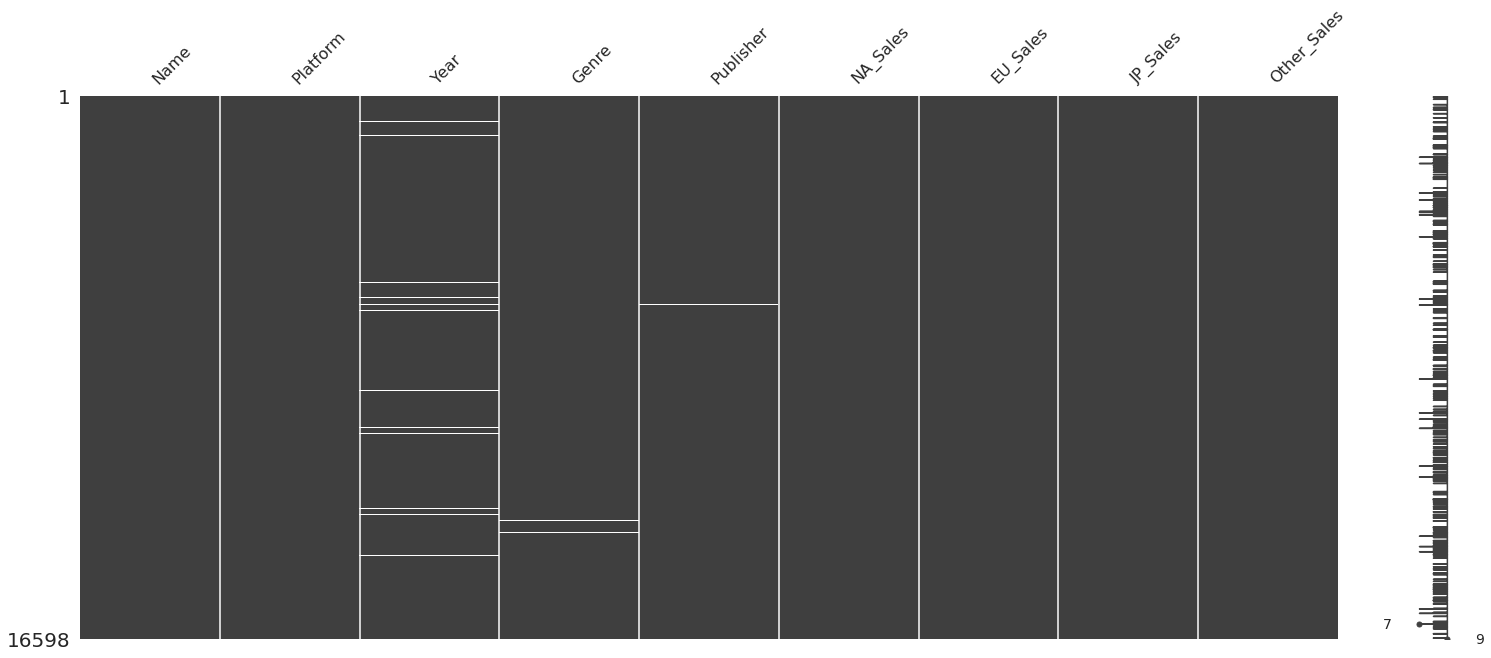

In [ ]:
# missingno 패키지를 활용 결측데이터를 matrix()함수로 시각화
import missingno as msno
msno.matrix(data)
plt.show()

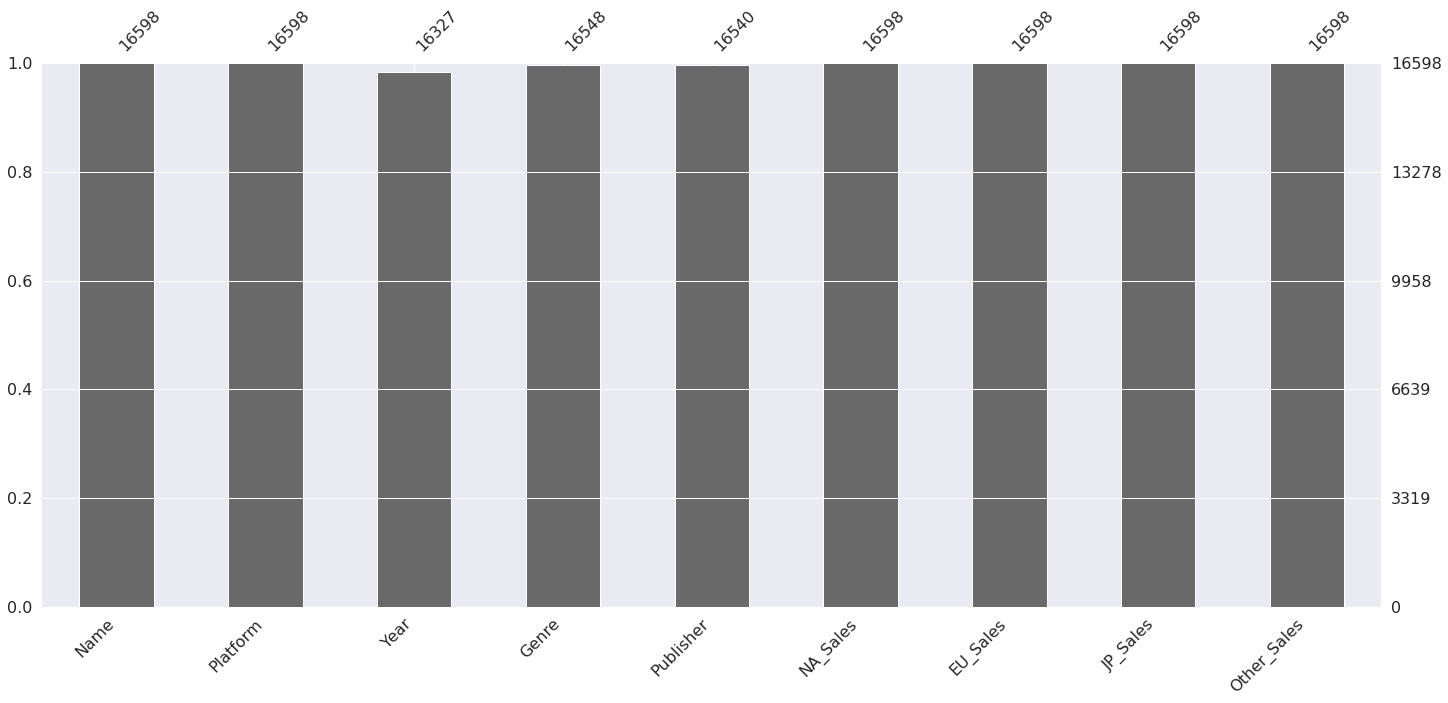

In [ ]:
# 각 열에 결측 데이터가 얼마나 존재하는지 bar()함수를 통해 시각화
msno.bar(data)
plt.show()

#1

####**Insight:**
- Year(연도) : 271개의 결측값,     
Genre(장르) : 총 50개의 결측값,    
Publisher(발행사) : 58개의 결측값

**문자형 데이터 값으로 실수형으로 변환필요**

- NA_Sales(북미 판매량), EU_Sales(유럽 판매량), JP_Sales(일본 판매량), Other_Sales(다른곳 판매량)

>단위 조정 K -> M으로 또한 데이터에 60K와 같이 숫자와 문자가 혼합되 들어가 있어 수정 필요. float 타입으로 변환해야함.




- **연도(Year)** 

>1980 ~ 2020년 자료이므로 1901년 또는 2089년은 없을 것으로 가정하에      

> 0 ~ 16 로 입력된 데이터는 2000을 더해 2000, 2010년대로 변환

> 86 ~ 98 로 입력된 데이터 1900을 더해 80,90년대로 변환

> 빈값은 전체 1.63%의 비중으로 데이터에 많은 영향이 없을 것으로 가정하고 평균값으로 대체

- **장르(Genre), 발행사(Publisher)**

> 전체 0.3%, 0.34%의 비중으로 데이터에 많은 영향이 없을 것으로 가정하에 

>제일 높은 빈도수가 나오는 장르(Action), 발행사(Electronic Arts )로 대체

In [ ]:
# 0~16까지 Year 데이터를 2000 ~ 2016으로 86~98까지 데이터를 1986 ~ 1998로 변환
def transform(row):
  if row['Year'] < 17 : return row['Year'] + 2000
  elif row['Year'] < 99 : return row['Year'] + 1900
  else : return row['Year']

data['Year'] = data.apply(transform, axis =1)

In [ ]:
# Year 데이터는 Year 평균 값으로 대체 전체 데이터의 1.63% 결측값이기에 영향은 미미할 것으로 예상
data['Year'] = data['Year'].fillna(data['Year'].mean())
# Year는 2010, 2011 딱떨어지므로 정수형(int32)로 바꾼다.
data.Year = data.Year.astype('int32')
data.Year

1        2008
2        2009
3        2010
4        2010
5        2010
         ... 
16594    2006
16595    2005
16596    2015
16597    2013
16598    1996
Name: Year, Length: 16598, dtype: int32

In [ ]:
# 판매량 데이터의 K, M 값을 제거하고 M단위로 맞춤.
repl_dict = {'[kK]': '*1e-3', '[mM]': '*1e0'}
Unit = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].replace(repl_dict, regex=True).applymap(pd.eval)

In [ ]:
# 데이터 확인
Unit.head(60)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,0.04,0.00,0.00,0.00
2,0.17,0.00,0.00,0.01
3,0.00,0.00,0.02,0.00
4,0.04,0.00,0.00,0.00
5,0.12,0.09,0.00,0.04
6,0.00,0.00,0.14,0.00
7,0.02,0.01,0.00,0.00
8,0.07,0.00,0.11,0.01
9,0.00,0.00,0.04,0.00
10,0.04,0.03,0.00,0.01


In [ ]:
# 기존 데이터와 단위조정한 데이터를 합한다.
data = pd.concat([data.iloc[:, :5], Unit], axis = 1)

In [ ]:
# Publisher, Genre는 가장 빈도수가 높은 것으로 채운다.
print(data.Publisher.value_counts(normalize=True))
print("" * 50)
print("." * 50)
print(data.Genre.value_counts(normalize=True))

Electronic Arts                 0.081681
Activision                      0.058948
Namco Bandai Games              0.056348
Ubisoft                         0.055683
Konami Digital Entertainment    0.050302
                                  ...   
Marvel Entertainment            0.000060
Glams                           0.000060
Tetris Online                   0.000060
BushiRoad                       0.000060
Palcom                          0.000060
Name: Publisher, Length: 578, dtype: float64

..................................................
Action          0.199722
Sports          0.141467
Misc            0.104786
Role-Playing    0.089618
Shooter         0.079043
Adventure       0.077351
Racing          0.075115
Platform        0.053420
Simulation      0.052272
Fighting        0.051184
Strategy        0.041093
Puzzle          0.034929
Name: Genre, dtype: float64


In [ ]:
# Electronic Arts , Action 값으로 빈데이터를 채운다.

data.Publisher = data.Publisher.fillna(data.Publisher.mode()[0])
data.Genre = data.Genre.fillna(data.Genre.mode()[0])

In [ ]:
# 데이터 확인
#data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  int32  
 3   Genre        16598 non-null  object 
 4   Publisher    16598 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(4), int32(1), object(4)
memory usage: 1.2+ MB


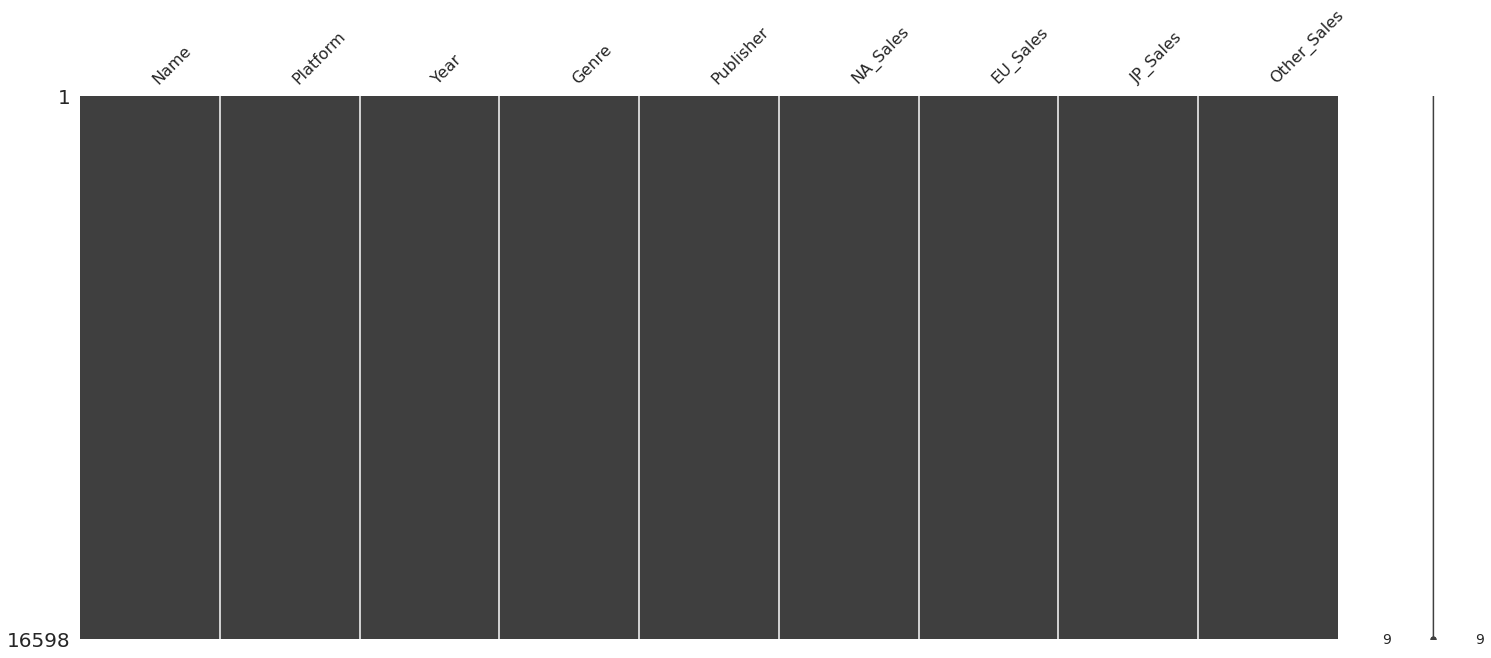

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


In [ ]:
msno.matrix(data)
plt.show()
print(data.isnull().sum())
# 결측값이 사라진 것을 확인할 수 있다.

#### **북미, 유럽, 일본, 기타 지역을 더해 세계 판매량을 계산**

In [ ]:
data['Global_Sales'] = data['NA_Sales'] + data['EU_Sales'] + data['JP_Sales']+ data['Other_Sales']

In [ ]:
# Global_Sales 값이 들어간 것을 확인
data.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [ ]:
# 수치형 자료에 대한 통계정보를 본다.
data.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.399807,0.264667,0.146652,0.077782,0.048063,0.537164
std,5.781426,0.816683,0.505351,0.309291,0.188588,1.555151
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


####**수치형(Numerical) 자료와 범주형(Categorical) 자료 분리**

In [ ]:
# 범주형 자료 데이터프레임
categorical_df = data.select_dtypes('O')
categorical_df.head()

,Name,Platform,Genre,Publisher
1,Candace Kane's Candy Factory,DS,Action,Destineer
2,The Munchables,Wii,Action,Namco Bandai Games
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist
4,Deal or No Deal: Special Edition,DS,Misc,Zoo Games
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,Platform,D3Publisher


In [ ]:
# 수치형 자료 데이터프레임
numerical_df = data.select_dtypes(('int', 'float'))
numerical_df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,0.04,0.00,0.00,0.00,0.04
2,0.17,0.00,0.00,0.01,0.18
3,0.00,0.00,0.02,0.00,0.02
4,0.04,0.00,0.00,0.00,0.04
5,0.12,0.09,0.00,0.04,0.25


In [ ]:
# 수치형, 범주형 데이터프레임 열 값을 리스트에 담는다.
categorical_features = categorical_df.columns
print(categorical_features)

numerical_features = numerical_df.columns
print(numerical_features)

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')
Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], dtype='object')


#2

In [ ]:
# 범주형 데이터에서 빈도수가 높은 값을 본다.
for category_name in categorical_features:
  print("Name:", category_name)
  print(' ' * 50)

  print(data[category_name].value_counts().head())

  print('.' * 50)
  print('.' * 50)

Name: Name
                                                  
Need for Speed: Most Wanted    12
Ratatouille                     9
FIFA 14                         9
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
Name: Name, dtype: int64
..................................................
..................................................
Name: Platform
                                                  
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Platform, dtype: int64
..................................................
..................................................
Name: Genre
                                                  
Action          3355
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Name: Genre, dtype: int64
..................................................
..................................................
Name: Publisher
                                                  
Electronic Arts 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16598 non-null  int32  
 3   Genre         16598 non-null  object 
 4   Publisher     16598 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


####**🎮데이터 설명**

총 10개의 열로 구성되어 있고 내용은 다음과 같습니다.

- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.(PC, PS4, 기타등등)
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임 배급사입니다.
- NA_Sales : 북미 매출액입니다.
- EU_Sales : 유럽 매출액입니다.
- JP_Sales : 일본 매출액입니다.
- Other_Sales : 기타지역 매출액입니다.
- Global_Sales : 총 매출액.

###**2. 전체 통계량**

In [ ]:
# 유일한값 찾기
games = data['Name'].unique()
platforms = data['Platform'].unique()
genres = data['Genre'].unique()
publisher = data['Publisher'].unique()


fig = go.Figure()

fig.add_trace(go.Indicator(
               mode = 'number',
               value = len(games),
               title = {'text' : 'Games', 'font' : {'color' : '#7758D6', 'size' : 25}},
               number = {'font' : {'color' : '#7758D6', 'size' : 50}},
               domain = {'row' : 0, 'column' : 0}
               ))

fig.add_trace(go.Indicator(
               mode = 'number',
               value = len(platforms),
               title = {'text' : 'Platform', 'font' : {'color' : '#F5542A', 'size' : 25}},
               number = {'font' : {'color' : '#F5542A', 'size' : 50}},
               domain = {'row' : 0, 'column' : 1}
               ))

fig.add_trace(go.Indicator(
               mode = 'number',
               value = len(genres),
               title = {'text' : 'Genre', 'font' : {'color' : '#59DB6F', 'size' : 25}},
               number = {'font' : {'color' : '#59DB6F', 'size' : 50}},
               domain = {'row' : 0, 'column' : 2}
               ))

fig.add_trace(go.Indicator(
               mode = 'number',
               value = len(publisher),
               title = {'text' : 'Publisher', 'font' : {'color' : '#F076BC', 'size' : 25}},
               number = {'font' : {'color' : '#F076BC', 'size' : 50}},
               domain = {'row' : 0, 'column' : 3}
               ))

fig.update_layout(
    grid = {'rows' : 1, 'columns' : 4, 'pattern' : "independent"}
)
fig.show()



#3

11,000 개의 게임
31개의 플렛폼
12개 장르
578개의 배급사

###**3. 지역에 따른 선호장르**

####TOP10 게임 장르는?

In [ ]:
# 장르의 갯수를 나타낸다.
data['Genre'].value_counts()

Action          3355
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

In [ ]:
# 막대그래프와 산점도로  상위 10개의 장르를 나타냄.
top_10_Genre = data.Genre.value_counts().reset_index()
top_10_Genre

fig = px.bar(
              top_10_Genre, 
              x = top_10_Genre['index'], 
              y = top_10_Genre['Genre'], 
              title = 'TOP 10 Genre', 
              labels = {'Genre' : 'Numbers', 'index' : 'Genre'}
             )
fig.show();

fig = px.scatter(
                  top_10_Genre,
                  x = top_10_Genre['index'], 
                  y = top_10_Genre['Genre'], 
                  title = 'TOP 10 Genre', 
                  labels = {'Genre' : 'Numbers', 'index' : 'Genre'}
                 )
fig.show();

#####**Insight:**

상위10개 장르 중 액션, 스포츠, 음악 장르의 게임이 주를 이룬다.

#### 지역별 장르 선호도?

In [ ]:
# 장르를 지역별로 그룹화한다.
genre_area = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' , 'Global_Sales']]
group_genre = genre_area.groupby(by = ['Genre']).sum()

# 보기 쉽게 %로 표현해보자.
group_genre['NA_Sales%'] = group_genre['NA_Sales']/group_genre['Global_Sales']
group_genre['EU_Sales%'] = group_genre['EU_Sales']/group_genre['Global_Sales']
group_genre['JP_Sales%'] = group_genre['JP_Sales']/group_genre['Global_Sales']
group_genre['Other_Sales%'] = group_genre['Other_Sales']/group_genre['Global_Sales']

group_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales%,EU_Sales%,JP_Sales%,Other_Sales%
Genre,,,,,,,,,
Action,895.42,535.28,170.78,191.99,1793.47,0.499267,0.298461,0.095223,0.107049
Adventure,105.66,64.05,51.95,16.81,238.47,0.443075,0.268587,0.217847,0.070491
Fighting,223.20,101.22,87.34,36.64,448.40,0.497770,0.225736,0.194781,0.081713
Misc,408.05,212.36,105.27,74.04,799.72,0.510241,0.265543,0.131634,0.092582
Platform,446.44,201.61,130.65,51.53,830.23,0.537731,0.242836,0.157366,0.062067
Puzzle,123.35,50.73,56.87,12.52,243.47,0.506633,0.208362,0.233581,0.051423
Racing,357.19,237.10,56.40,77.10,727.79,0.490787,0.325781,0.077495,0.105937
Role-Playing,319.54,183.58,344.95,56.96,905.03,0.353071,0.202844,0.381148,0.062937
Shooter,581.92,313.05,38.28,102.65,1035.90,0.561753,0.302201,0.036953,0.099093


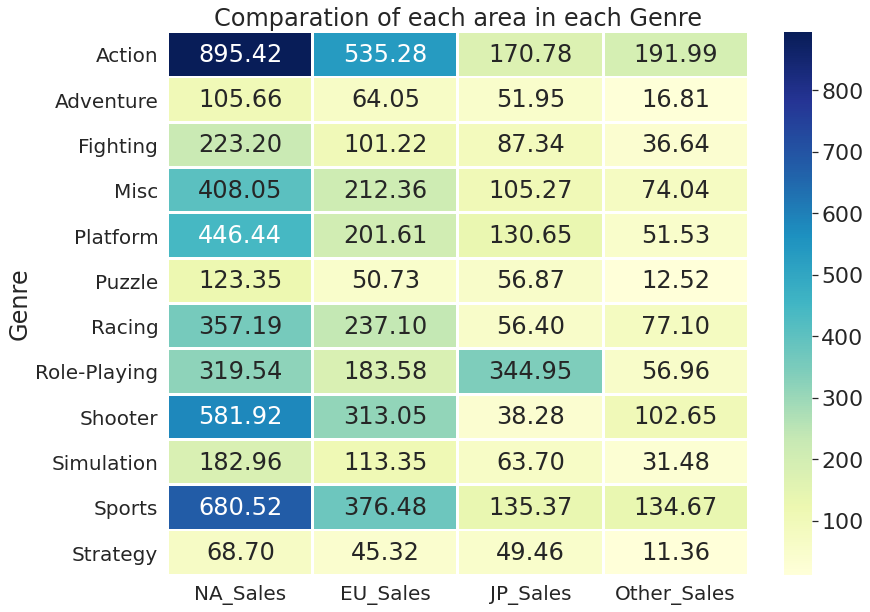

In [ ]:
plt.figure(figsize = (13, 10))
sns.set(font_scale = 2)

sns.heatmap(group_genre.loc[:, 'NA_Sales':'Other_Sales'], annot = True, fmt = '.2f', linewidths = 2, cmap="YlGnBu")

plt.title("Comparation of each area in each Genre")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

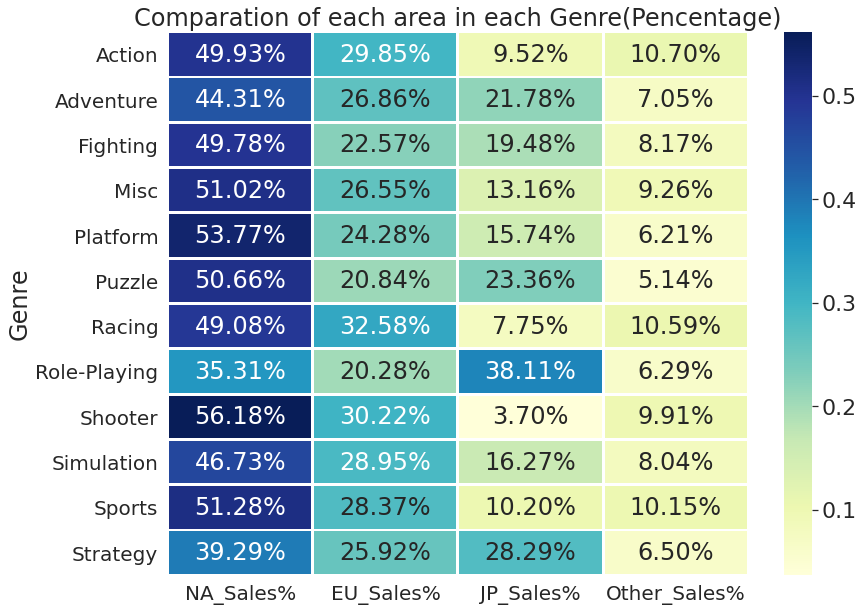

In [ ]:
plt.figure(figsize = (13, 10))
sns.set(font_scale = 2)

sns.heatmap(group_genre.loc[:,'NA_Sales%':'Other_Sales%'], annot = True, fmt = '.2%', linewidths = 2, cmap="YlGnBu")

plt.title("Comparation of each area in each Genre(Pencentage)")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

#####**Insight:**

북미 지역이 전체 장르의 판매량이 높은 편이다.

- 북미 : 액션
- 유럽 : 액션
- 일본 : RPG
- 기타 : 액션

순으로 판매량이 높고 지역적으로 장르 선호도는 약간의 차이는 있으나 북미와 유럽이 선호하는 장르는 비슷해 보인다.

일본의 경우 북미, 유럽, 기타 지역과 달리 RPG장르의 선호도가 높은 것으로 보인다.

####상관관계

In [ ]:
# corr 사용해 상관관계를 살펴보자.

AD = pd.DataFrame(group_genre.loc[:, 'NA_Sales':'Other_Sales']).reset_index()
AD.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.987021,0.308179,0.975804
EU_Sales,0.987021,1.000000,0.305109,0.994491
JP_Sales,0.308179,0.305109,1.000000,0.292287
Other_Sales,0.975804,0.994491,0.292287,1.000000


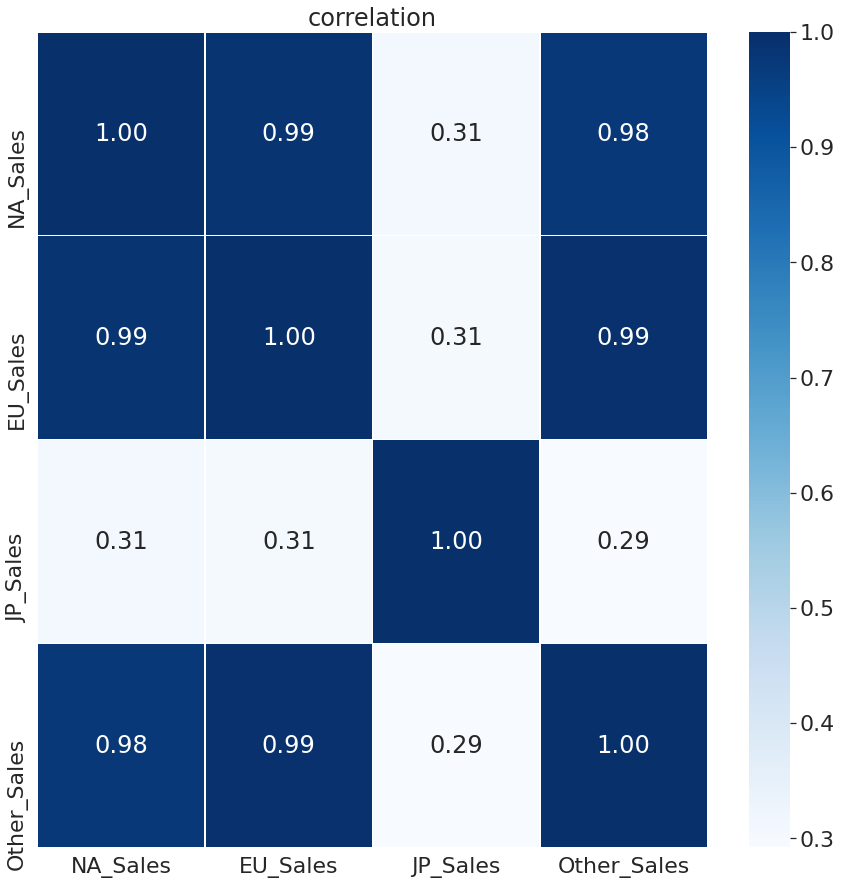

In [ ]:
# heatmap으로 보기 쉽게 표현.
sns.set(font_scale = 2)
plt.figure(figsize=(15,15));
plt.title("correlation");
sns.heatmap(data = AD.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues');

#####**Insight:**

heatmap을 봤을 때, 북미, 유럽, 기타 지역의 상관도가 높은 것을 확인할 수 있다.

In [ ]:
genre = group_genre.loc[:, 'NA_Sales': "Global_Sales"] # 장르별 지역 매출액 자료
genrecount = pd.DataFrame(data["Genre"].value_counts()) # 장르별 숫자 카운팅
genrecount.reset_index(level=0, inplace=True) # 장르별 숫자 데이터 인덱스 재설정
genrecount.rename(columns={"Genre": "Counts","index":"Genre"}, inplace=True) # 숫자와, 장르로 인덱스 재설정
# 장르별 지역 매출액 자료와 장르별 숫자 카운팅 자료 합친다.
genre=pd.merge(genre,genrecount,on="Genre")
genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Counts
0,Action,895.42,535.28,170.78,191.99,1793.47,3355
1,Adventure,105.66,64.05,51.95,16.81,238.47,1280
2,Fighting,223.20,101.22,87.34,36.64,448.40,847
3,Misc,408.05,212.36,105.27,74.04,799.72,1734
4,Platform,446.44,201.61,130.65,51.53,830.23,884
5,Puzzle,123.35,50.73,56.87,12.52,243.47,578
6,Racing,357.19,237.10,56.40,77.10,727.79,1243
7,Role-Playing,319.54,183.58,344.95,56.96,905.03,1483
8,Shooter,581.92,313.05,38.28,102.65,1035.90,1308
9,Simulation,182.96,113.35,63.70,31.48,391.49,865


In [ ]:
# 테이블 데이터를 만들고 이름을 열이름 제설정
table_data = genre[["Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales","Global_Sales"]]

table_data = table_data.rename(columns = {"NA_Sales": "NA", 
                                  "EU_Sales":"EU", 
                                  "JP_Sales": "JP","Other_Sales":"Other","Global_Sales":"Total"})

#### 그래프

In [ ]:
from plotly.offline import init_notebook_mode,iplot
x = genre.Genre # x축의 값을 장르로 설정


NA_P = list(group_genre['NA_Sales%'] * 100)
EU_P = list(group_genre['EU_Sales%'] * 100)
JP_P = list(group_genre['JP_Sales%'] * 100)
Other_P = list(group_genre['Other_Sales%'] * 100)

trace1 = go.Bar(
    x=x,
    y=NA_P,
    name="NA" ,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='#A62103',
        line=dict(
            color='#F2F2F2',
            width=3),
        ),
    opacity=0.75)
trace2 = go.Bar(
    x=x,
    y=EU_P,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='#F28705',
        line=dict(
            color='#F2F2F2',
            width=3),
        ),
    opacity=0.75,
    name = "EU",
    )
trace3 = go.Bar(
    x=x,
    y=JP_P,
    xaxis='x2', yaxis='y2',
  
    marker=dict(
        color='#9AA623',
        line=dict(
            color='#F2F2F2',
            width=3),
        ),
    opacity=0.75,
    name = "JP",
    )
trace4 = go.Bar(
    x=x,
    y=Other_P,
    xaxis='x2', yaxis='y2',
    
    marker=dict(
        color='#090FF0',
        line=dict(
            color='#F2F2F2',
            width=3),
        ),
    opacity=0.75,
    name = "Other",)
trace5=go.Table(
  header = dict(
    values = table_data.columns,
    line = dict(color = '#F2F2F2',width=3),
    fill = dict(color = ["darkslateblue","blue","red", "orange","purple","green"]),
    align = ['left','center'],
    font = dict(color = 'white', size = 12),
     height=30,
  ),
  cells = dict(
    values = [table_data.Genre,round(table_data["NA"]),round(table_data["EU"]), round(table_data["JP"]), round(table_data["Other"]),round(table_data["Total"])],
    height=30,
    line = dict(color = '#F2F2F2',width=3),
    fill = dict(color = ["silver","rgb(158,202,225)","darksalmon", "gold","mediumorchid","yellowgreen"]),
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 12)),
    domain=dict(x=[0.60,1],y=[0,0.95]),
)

trance_df = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(barmode='stack',autosize=False,width=1200,height=650,
                legend=dict(x=.58, y=0,orientation="h",font=dict(family='Courier New, monospace',size=11,color='#000'),
                           bgcolor='beige', bordercolor='beige', borderwidth=1),
                title='North America, Europe, Japan and Other Sales Percentage and Amounts According to Genre',
                titlefont=dict(family='Courier New, monospace',size=17,color='black'),
                xaxis2=dict(domain=[0, 0.50],anchor="y2", title='Genre',titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')), yaxis2=dict( domain=[0, 1],anchor='x2',title="Total Percentage",titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')),
                paper_bgcolor='beige',plot_bgcolor='beige',
                annotations=[ dict( text='Sales Percentage According to Region',x=0.08,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family="Courier New, monospace"),bgcolor="lightyellow",borderwidth=5),dict( text='Total Sales(In Millions)',x=0.9,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family='Courier New, monospace'),bgcolor="lightyellow",borderwidth=5)],
              
                  )
fig = go.Figure(data=trance_df, layout=layout)
iplot(fig)

Insight:
지역별 게임 장르의 비율을 봤을때,

북미지역은 RPG와 전략 장르를 제외한 모든 장르에서 총 매출의 44%를 넘는 수치를 보인다.
특히 슈팅(56%), 플랫폼(53%), 스포츠(51%),뮤직(51%),액션(49%)로 높은 비율을 보인다.

유럽지역은 레이싱(32%), 슈팅(30%), 액션(29%), 스포츠(28%) 가높은 비율을 보이고,

일본지역은 RPG(38%), 전략(28%), 퍼즐(23%), 어드벤쳐(21%) 가 높은 비율을 보인다.

기타지역에서는 액션(10.7%), 레이싱(10.5%), 스포츠(10.1%) 순으로 높은 비율을 보인다.

------------------------------------------

지역별 게임 장르 판매량을 봤을 떄 지역별 선호하는 게임 장르의 차이는 있으나

대체적으로 슈팅, 액션, 스포츠 장르를 선호하는 경향이 있다.

북미, 유럽, 기타 지역은 슈팅과 액션 스포츠 장르의 게임을 선호하는 경향이 강하며,

일본지역은 RPG를 선호하는 경향이 강하다.






###**4. 연도별 게임 트랜드**

####게임 출시가 가장 많은 연도?

#4

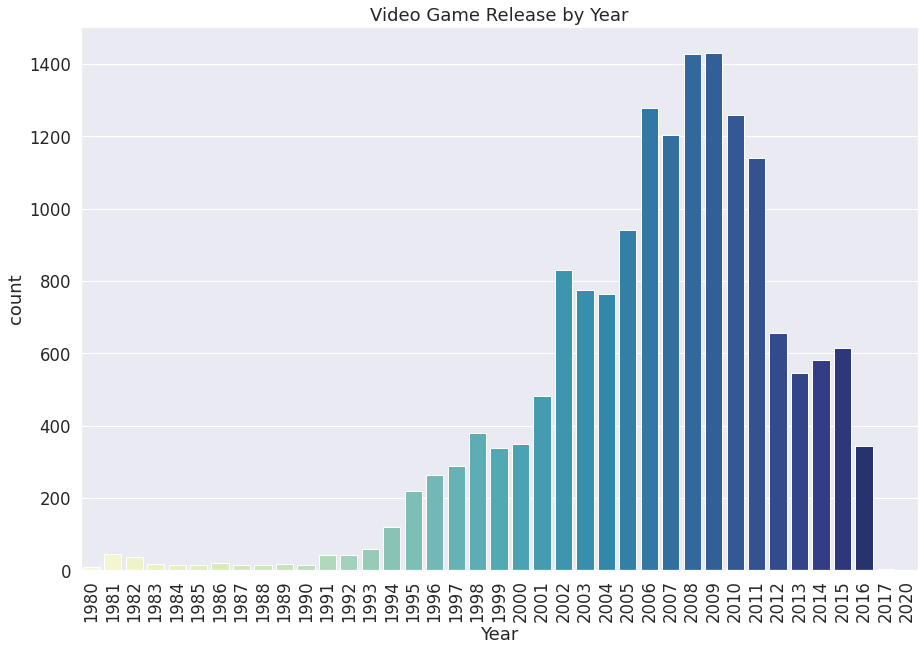

In [ ]:
# 막대 그래프로 표현
plt.figure(figsize = (15, 10))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Year', data = data, order = data.groupby(by = ['Year'])['Name'].count().index, palette = "YlGnBu") # 연도로 그룹화 하고 Name = 비디오 게임 수를 카운팅 한다.
plt.title("Video Game Release by Year")
plt.xticks(rotation = 90); # 글자가 겹치므로 90도 회전 시킴.

#####Insight:

2000년을 기점으로 2012년까지 많은 수의 게임이 출시 되었다.

2010년도부터 감소 추세이다.

1995년 ~ 2000년 닷컴버블 기간에 인터넷 관련분야와 같이 게임산업분야도 성장한 것 같다.

2000년 버블이 터지며 감소추세를 보이지만 2001년 후 부터 온라인 게임이나 워크래프트, 스타크래프트와 같은 히트작, Xbox ,PS2와 같은 콘솔시장의 성장으로 관련 게임 출시가 증가한 것으로 보인다.

2007년 아이폰 출시, 07, 09년 삼성 옴니아, 갤럭시 등 스마트폰의 보급으로 인해 모바일 플렛폼으로의 변화로 인해 감소 추세가 이어지고 있는 것으로 예상된다.


####연도별 게임장르의 글로벌 판매량

#5

In [ ]:
fig = px.scatter(data,
                 x="Year", 
                 y="Global_Sales",
                 color="Genre",
                 size='Global_Sales', 
                 hover_data=['Name'],
                 title="Year Wise Global Video Game Sales by Genere",
                )

fig.show()

#####Insight:
1980년대는 주로 플랫폼, 슈팅, 퍼즐 장르의 게임이 주를 이루고 플랫폼 게임의 판매량이 높다.

1990년대는 RPG, 플랫폼, 레이싱, 어드벤처 장르의 게임이 주를 이루고 RPG 게임 판매량이 높다.

2000년대는 스포츠, 레이싱, 플랫폼, 음악 장르의 게임이 주를 이루고 스포츠 게임 판매량이 높다.

2010년 이후 액션과 슈팅게임이 주를 이루고 슈팅 게임의 판매량이 높다.


년도별로 매출액이 높은 대표적인 게임이 트렌드를 이루고 있는 것 같다.

1982년 펙맨, 1984년 덕 헌터, 1985년 슈퍼마리오, 1989년 테트리스
1996년 포켓몬

2002년 GTA 바이스시티, 2004년 산안드레스 2006년 윌 스포츠
2013년 GTA 5 등

주로 이미 성공을 한 게임의 시리즈가 계속적으로 나왔을 때 고정적인 수익 창출로 이어지고 있는 것 같으며, 

Will Sport의 경우 기존 콘솔과는 다른 체험 방식의 콘솔로 기존 닌텐도의 인기가 있었던 마리오와 같은 게임을 Will 콘솔로 다시 발매해 인기를 끌었던 것으로 예상된다.

####단순회귀분석

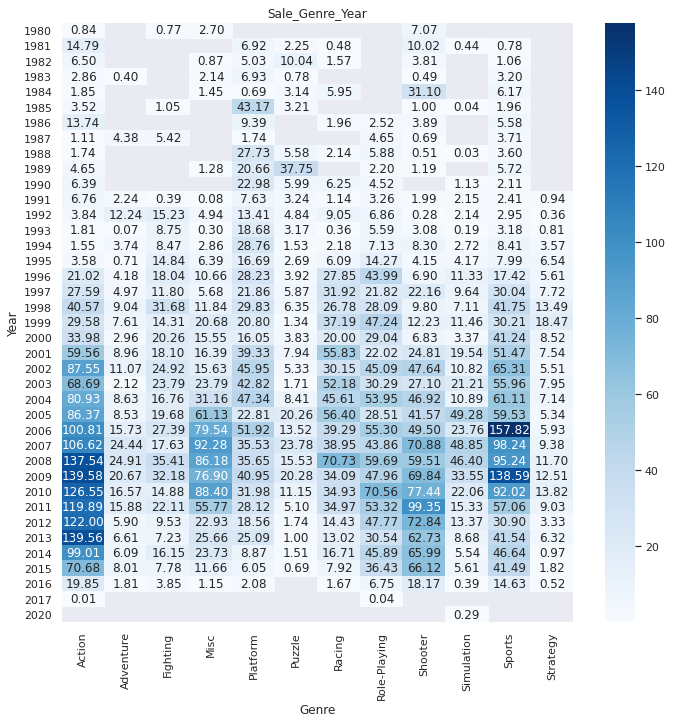

In [ ]:
# 연도별 장르 게임 글로벌 매출액에 대한 테이블을 만듭니다.
Sale_Genre_Year = pd.pivot_table(data, 
                                 index = ['Year'], 
                                 columns = ["Genre"], 
                                 values = ['Global_Sales'],
                                 aggfunc = np.sum)
Sale_Genre_Year.columns = Sale_Genre_Year.columns.get_level_values(1)

plt.figure(figsize = (10, 10))
sns.set(font_scale = 1)
sns.heatmap(Sale_Genre_Year,
            annot = True,
            fmt = '.2f',
            cmap = 'Blues')
plt.tight_layout()
plt.ylabel('Year')
plt.xlabel('Genre')
plt.title("Sale_Genre_Year")
plt.show()

#####Insight:
히트맵을 보면 전체기간을 따질때 액션, 스포츠, 뮤직, 슈팅, RPG 레이싱, 플렛폼 장르의 게임이 수익률이 좋은 것으로 보여지고,

1991년 부터 모든 장르의 게임이 출시되기 시작했다고 생각된다.

2017년과 2020년도는 자료가 부족해 정확히 파악이 어렵다.

####연도별 지역 총 매출액 그래프

In [ ]:
from plotly.offline import init_notebook_mode,iplot
year_wise_sales = data.loc[:, ['Name', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by =  'Year'  ).sum()


fig1 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['NA_Sales'],
                  name = "North America's Sales",
                  line_shape='vh'
                 )

fig2 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['EU_Sales'],
                  name = "Europe's Sales",
                  line_shape='vh')

fig3 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['JP_Sales'],
                  name = "Japan's Sales",
                  line_shape='vh')

fig4 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['Other_Sales'],
                  name = "Other Sales",
                  line_shape='vh')

figs = [ fig1, fig2, fig3, fig4 ]

layout = dict(title = 'Year Wise Total Game Sales',
              xaxis= dict(title= 'Year' ),
              yaxis= dict(title= 'Total Sales In Millions',)
             )

figure = dict(data = figs, layout = layout)

iplot(figure)

#####Insight:

2006 ~ 2011년도까지 매출액이 높은 편.
북미 지역과 유럽지역에서의 매출이 높은 편.

일본과, 기타지역 매출도 같은 흐름을 보이나
일본의 경우 완만한 추세를 보이며 꾸준한 매출을 보이고 있다. 규모도 북미와 유럽 다음으로 상당히 큰 시장규모를 가지고 있는 것으로 생각한다.

1995 ~ 1998년 , 2001년 ~ 2008년 오름세를 보이고, 2000년, 2010년 ~ 2015년에 내림세 을 보임.

--------------------------------------
연도별 게임 장르 글로벌 매출액에 대한 Heatmap을 보면 1991년 부터 모든 장르의 게임이 출시되기 시작했다.

연도별 지역 총 매출액 그래프 보면 1991년 이후 많은 매출액이 발생한다는 것을 알수 있습니다.

따라서 2017년도 부터 2020년도 까지는 자료가 부족함으로 1991년 ~ 2016년까지의 자료로 분석을 하도록 한다.

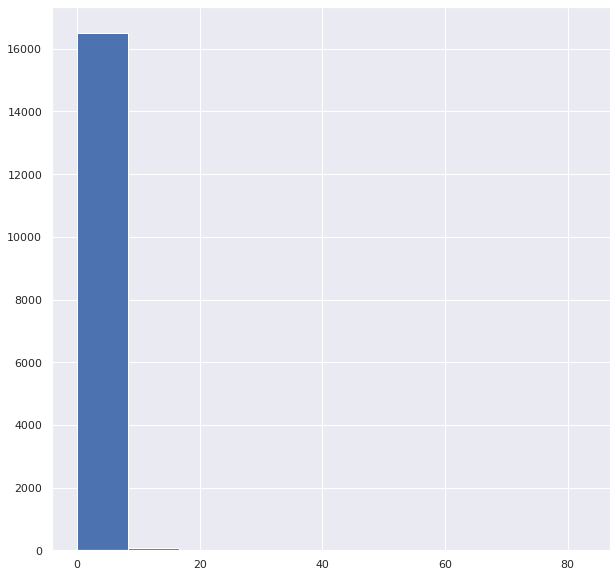

In [ ]:
# 글로벌 매출
plt.figure(figsize=(10,10))
data.Global_Sales.hist()
plt.show()

#####Insight2: 
매년 출시되는 게임 수가 다르므로 글로벌 매출액은 시간에 따라 일관된 척도가 되지 않습니다.

히스토그램을 보면 데이터가 오른쪽으로 치워쳐 있으므로 매출 연간 평균 보다는 매년 장르다 판매되는 게임 수의 중앙값으로 분석에 사용해야한다.

In [ ]:
# 1991년 부터 2016년 까지 데이터 추출
data1 = data.loc[data.Year >= 1991]
data1 = data.loc[data.Year < 2017]
# 중앙값
Mid = pd.pivot_table(data1,index = ['Year'],
                     columns = ['Genre'],
                     values = ['Global_Sales']
                     ,aggfunc = np.median)

Mid.columns = Mid.columns.get_level_values(1)

Mid = Mid.dropna()


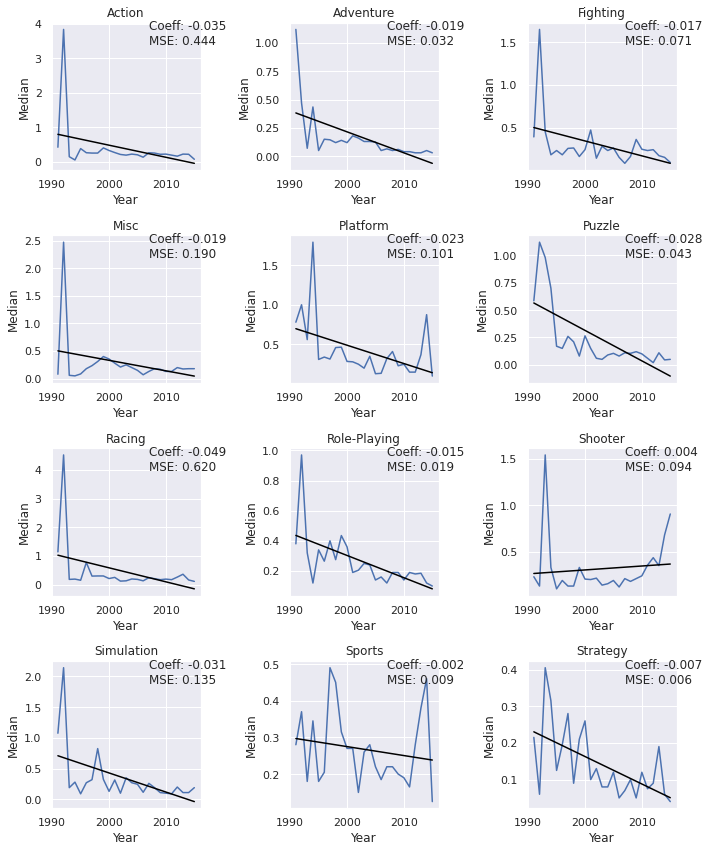

In [ ]:
from sklearn import linear_model
def Linear_Regression_Plot(Data): #선형 회귀 그래프
    R_Coefficient = [] 
    R_MSE = []
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,12)) #

    x_data = np.transpose(np.matrix(Data.index))

    count = 0
    
    for genre in Data.columns:
        axs = axes[count//3,count%3]
        y_data = Data[genre].to_frame()
    
        # Linear regression
        regr = linear_model.LinearRegression()
        regr.fit(x_data,y_data)
        
        # MSE
        MSE = np.mean((regr.predict(x_data)-y_data)**2)
        
        R_Coefficient.append(regr.coef_[0][0])
        R_MSE.append(MSE[0])

        Data[genre].plot(ax=axs)
        axs.plot(x_data,regr.predict(x_data), color='black')

        y_lims = axs.get_ylim()
        
        
        txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,MSE)
        y_loc = 0.85*(y_lims[1]-y_lims[0])+y_lims[0]
        axs.text(2007,y_loc,txt)

        axs.set_title(genre)
        axs.set_xlabel('Year')
        axs.set_ylabel('Median')
        count+=1
    fig.tight_layout()
    
    return [R_Coefficient, R_MSE]
    
[R_Coefficient, R_MSE] = Linear_Regression_Plot(Mid)

#####Insight3: 회귀그래프

슈팅 게임을 제외한 모든 장르의 게임이 하락세를 보이고 있고 1991년 ~ 1995년 사이에 급증한 데이터가 있어 95년도 이후로 다시한번 분석해보겠습니다.

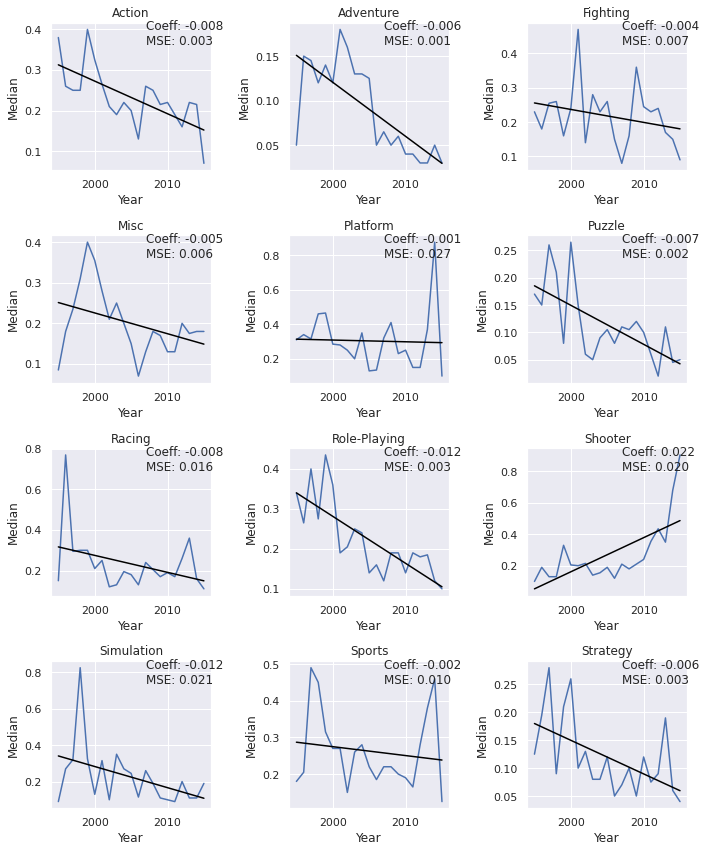

In [ ]:
Mid = Mid.loc[Mid.index >= 1995]

[R_Coefficient_after95, R_MSE_after95] = Linear_Regression_Plot(Mid)

#####Insight4:

슈팅게임을 제외한 모든 장르 게임의 하락세가 보이나, 어드벤처, RPG, 시뮬레이션, 전략 게임 매출이 크게 감소한 것으로 보입니다.

또한 각 장르별로 특정한 게임 매출액이 높을 것으로 예상됩니다.

연도에 따라 게임 트렌드가 바뀔 수는 있으나 매출이 좋은 특정 게임의 출시에 따라 트렌드가 바뀌는 경향이 있는듯 합니다.

또한 슈팅 장르를 제외한 모든 장르에서 하락세를 보이고 있어 전체 매출도 감소할 것으로 보입니다.

In [ ]:
Results = pd.DataFrame(
                        {
                        'Coeff 1991':R_Coefficient,
                        'MSE 1991':R_MSE,
                        'Coeff 1995':R_Coefficient_after95,
                        'MSE 1995':R_MSE_after95
                        },
                        index = list(Mid.columns)
                      )

Column_Order = ['Coeff 1991','MSE 1991','Coeff 1995','MSE 1995']

Results[Column_Order].head(n=len(list(Mid)))

,Coeff 1991,MSE 1991,Coeff 1995,MSE 1995
Action,-0.035085,0.444157,-0.008039,0.002882
Adventure,-0.018542,0.032349,-0.006065,0.001131
Fighting,-0.017458,0.070618,-0.003773,0.006896
Misc,-0.019019,0.189503,-0.005123,0.005552
Platform,-0.023150,0.100685,-0.001006,0.026947
Puzzle,-0.027812,0.042779,-0.007136,0.002418
Racing,-0.048935,0.619529,-0.008364,0.016248
Role-Playing,-0.014773,0.018542,-0.011747,0.003335
Shooter,0.004231,0.093567,0.021714,0.019742
Simulation,-0.031054,0.134892,-0.011610,0.020771


#####Insight5:

앞으로 새로운 게임의 출시가 줄어들 것으로 보이고 그나마 오름세인 슈팅게임이 트렌드가 되지 않을까 예상됩니다.

현재 게임 플랫폼이 일반 PC나 플레이스테이션에서 모바일로 넘어가고 있어 간편하게 즐길 수 있는 슈팅게임이 장르가 상승세가 보이는 듯 하다.

###**5. 매출이 높은 게임 분석**

####게임별 판매량

In [ ]:
# 판매량을 게임별로 그룹화한다.
Game_sale = data[['Name','Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' , 'Global_Sales']]
Top_sale_game = Game_sale.sort_values('Global_Sales', ascending = False)[:10]
#Top_sale_game.drop('Global_Sales', axis = 1, inplace = True)

Top_sale_game

,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2909,Wii Sports,2006,41.49,29.02,3.77,8.46,82.74
4200,Super Mario Bros.,1985,29.08,3.58,6.81,0.77,40.24
12580,Mario Kart Wii,2008,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,2009,15.75,11.01,3.28,2.96,33.00
7830,Pokemon Red/Pokemon Blue,1996,11.27,8.89,10.22,1.00,31.38
1204,Tetris,1989,23.20,2.26,4.22,0.58,30.26
6938,New Super Mario Bros.,2006,11.38,9.23,6.50,2.90,30.01
3015,Wii Play,2006,14.03,9.20,2.93,2.85,29.01
16532,New Super Mario Bros. Wii,2009,14.59,7.06,4.70,2.26,28.61
10489,Duck Hunt,1984,26.93,0.63,0.28,0.47,28.31


In [ ]:
fig = go.Figure(go.Bar(x = Top_sale_game['Name'],
                       y = Top_sale_game['Global_Sales'],
                       marker = {'color': Top_sale_game ['Global_Sales'],'colorscale': 'Viridis'}))
fig.update_layout(title_text='Top sales Game', 
                  xaxis_title="Name",
                  yaxis_title="Global_Sales")
fig.show()


#6

#####Insight1:

최고 많이 팔린 게임은 윌 스포츠, 슈퍼마리오브라더스, 마리오카트 순으로 대분이 닌텐도와 관련된 게임이다.

윌, 마리오, 포켓몬과 같은 계열의 게임 수익이 높다고 볼 수 있다.

한번 고정적인 수익을 올린 게임은 인기가 높아 시리즈로 발매되거나 새로운 버전이 나오더라도 수익을 원활히 창출할 수 있을 것으로 보인다.

####Top 100 게임

In [ ]:
df1 = data.sort_values(by= "Global_Sales", ascending= False)
df1['Rank'] = df1['Global_Sales'].rank(ascending= False)
df1 = df1.head(100)

In [ ]:
trace1 = go.Scatter(
                    x = df1.Rank,
                    y = df1.NA_Sales,
                    mode = "markers",
                    name = "North America",
                    marker = dict(color = 'rgba(28, 149, 249, 0.8)',size=8),
                    text= df1.Name)

trace2 = go.Scatter(
                    x = df1.Rank,
                    y = df1.EU_Sales,
                    mode = "markers",
                    name = "Europe",
                    marker = dict(color = 'rgba(249, 94, 28, 0.8)',size=8),
                    text= df1.Name)
trace3 = go.Scatter(
                    x = df1.Rank,
                    y = df1.JP_Sales,
                    mode = "markers",
                    name = "Japan",
                    marker = dict(color = 'rgba(150, 26, 80, 0.8)',size=8),
                    text= df1.Name)
trace4 = go.Scatter(
                    x = df1.Rank,
                    y = df1.Other_Sales,
                    mode = "markers",
                    name = "Other",
                    marker = dict(color = 'lime',size=8),
                    text= df1.Name)
                    

dt = [trace1, trace2,trace3,trace4]
layout = dict(title = 'North America, Europe, Japan and Other Sales of Top 100 Video Games',
              xaxis= dict(title= 'Rank',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'Sales(In Millions)',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white",),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)' )
fig = dict(data = dt, layout = layout)
iplot(fig)

#####Insight:

윌 스포츠 게임, 
마리오 시리즈, 
포켓몬스터 시리즈, 
GTA, 
Call of Duty,  
Halo, 
파이널 판타지, 
배틀필드,  

순으로 판매량 순위가 높은 대표적인 게임으로 볼 수 있다.

###**6. 어떤 배급사가 매출이 높은가?**

In [ ]:
# 배급사별로 그룹화한다.
Publisher_sale = data[['Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' , 'Global_Sales']]
group_Publisher = Publisher_sale.groupby(by = ['Publisher']).sum()
group_Publisher = group_Publisher.sort_values('Global_Sales', ascending = False)[:10].reset_index()

In [ ]:
fig = go.Figure(go.Bar(x = group_Publisher['Publisher'],
                       y = group_Publisher['Global_Sales'],
                       marker = {'color': group_Publisher ['Global_Sales'],'colorscale': 'Viridis'}))
fig.update_layout(title_text='Top sales Publisher', 
                  xaxis_title="Publisher",
                  yaxis_title="Global_Sales")
fig.show()

#7

#####Insight:

많은 매출을 올린 배급사를 보면 닌텐도, 일렉트로닉 아츠가 대표적인데 닌텐도사의 매출액이 압도적으로 높습니다. 

판매량이 높은 게임을 보유해 높을 것을 예상하고, 일렉트로닉아츠는 세계적인 게임유통사로 
인기 장르 중 스포츠, 액션 게임의 비중이 높아 매출액이 좋을 것으로 판단됩니다.

대표적인 게임 (피파시리즈, NFL, 니드포스피드, 배틀필드)


In [ ]:
top_sales = data.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], ascending=False).head(10)

# ['NA_Sales', '', '', '']
dicts_name = {
    'NA_Sales' : "North America Sales ( In Millions)",
    'EU_Sales' : "Europe Sales ( In Millions)",
    'JP_Sales' : "Japan Sales ( In Millions)",
    'Other_Sales' : "Other Sales ( In Millions)",
    'Global_Sales' : "Global_Sales( In Millions)"
}

for (key, title) in dicts_name.items():
    
    fig = px.sunburst(top_sales, path = ['Genre', 'Publisher', 'Platform'], values = key, title= 'Top Selling by '+ title)
    
    fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=40, l=2, r=2, b=5)
    )

    fig.show()

#####Insight:

닌텐도 wil 스포츠의 압도적인 점유율로 인해  닌텐도 DS 플렛폼, 스포츠 게임 장르에서 전지역별로 높은 점유율으 보입니다.

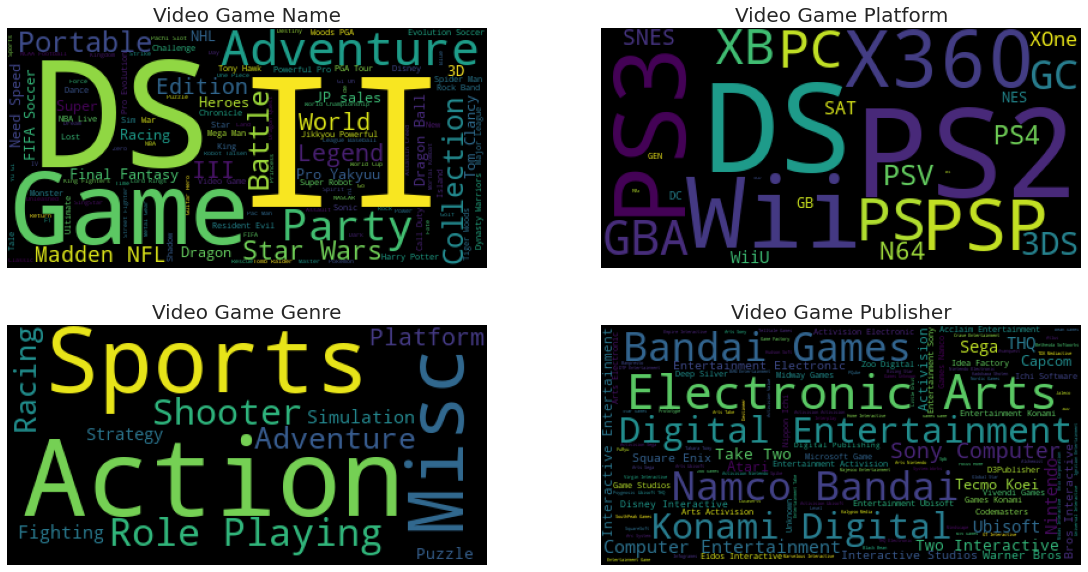

In [ ]:
from wordcloud import WordCloud, STOPWORDS

global_sales = data.sort_values(by='Other_Sales', ascending=False)

# plt.subplot(1, 2, 1)

fig = plt.figure(figsize=(17,17))

for index, col,  in enumerate(categorical_features):
  plt.subplot(len(categorical_features), 2, index + 1)
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(stopwords=stopwords).generate(" ".join(global_sales[col]))

# Show WordCloud Image
  plt.imshow(wordcloud)
  plt.title("Video Game " + col, fontsize=20)
  plt.axis('off')
  plt.tight_layout(pad=3)

plt.show()

#####Insight:

WordCloud Image 이미지로 나타내본 결과 게임의 경우 DS가 붙은 닌텐도 사의 게임과 II로 보와 시리즈로 출시 되는 게임이 많을 것을 보입니다.

플렛폼의 경우 닌텐도 DS, Wii, 플레이스테이션 시리즈, 엑스박스, 피씨가 빈도수가 높을 것으로 보이며

게임 장르의 경우 스포츠 액션

배급사의 경우 일렉트로닉아츠(미국), 디지털 엔터테인먼트(영국), 코나미 디지털(일본), 남코 반다이(일본), 테이크-투(미국), 유비소프트(프랑스), 소니(일본)

보이며 대형 배급사가 주를 이룬다.

###**7. 장르와 플렛폼**

In [ ]:
action_df = data[data.Genre=="Action"]
sports_df = data[data.Genre=="Sports"]
misc_df = data[data.Genre=="Misc"]
role_df = data[data.Genre=="Role-Playing"]
shooter_df = data[data.Genre=="Shooter"]
adventure_df = data[data.Genre=="Adventure"]
race_df = data[data.Genre=="Racing"]
platform_df = data[data.Genre=="Platform"]
simulation_df = data[data.Genre=="Simulation"]
fight_df = data[data.Genre=="Fighting"]
strategy_df = data[data.Genre=="Strategy"]
puzzle_df = data[data.Genre=="Puzzle"]

In [ ]:
fig1 = go.Histogram(
                    x = action_df.Platform,
                    opacity = 0.7,
                    name = "action",
                    marker = dict(color = "#F22816")
                    )
fig2 = go.Histogram(
                    x = sports_df.Platform,
                    opacity = 0.7,
                    name = "sports",
                    marker = dict(color = "#8C1A0F")
                    )
fig3 = go.Histogram(
                    x = misc_df.Platform,
                    opacity = 0.7,
                    name = "misc",
                    marker = dict(color = "#400101")
                    )
fig4 = go.Histogram(
                    x = role_df.Platform,
                    opacity = 0.7,
                    name = "role",
                    marker = dict(color = "#0D0D0D")
                    )
fig5 = go.Histogram(
                    x = shooter_df.Platform,
                    opacity = 0.7,
                    name = "shooter",
                    marker = dict(color = "#1B0126")
                    )
fig6 = go.Histogram(
                    x = adventure_df.Platform,
                    opacity = 0.7,
                    name = "adventure",
                    marker = dict(color = "#4B498C")
                    )
fig7 = go.Histogram(
                    x = race_df.Platform,
                    opacity = 0.7,
                    name = "race",
                    marker = dict(color = "#6F7DA6")
                    )
fig8 = go.Histogram(
                    x = platform_df.Platform,
                    opacity = 0.7,
                    name = "platform",
                    marker = dict(color = "#93A2BF")
                    )
fig9 = go.Histogram(
                    x = simulation_df.Platform,
                    opacity = 0.7,
                    name = "simulation",
                    marker = dict(color = "#A63F3F")
                    )
fig10 = go.Histogram(
                    x = fight_df.Platform,
                    opacity = 0.7,
                    name = "fight",
                    marker = dict(color = "#BF0436")
                    )
fig11 = go.Histogram(
                    x = strategy_df.Platform,
                    opacity = 0.7,
                    name = "strategy",
                    marker = dict(color = "#8C0335")
                    )
fig12 = go.Histogram(
                    x = puzzle_df.Platform,
                    opacity = 0.7,
                    name = "puzzle",
                    marker = dict(color = "#BF4904")
                    )
fig_data = [fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8, fig9, fig10, fig11, fig12]

cells = dict(
    values = [table_data.Genre,round(table_data["NA"]),round(table_data["EU"]), round(table_data["JP"]), round(table_data["Other"]),round(table_data["Total"])],
    height=30,
    line = dict(color = '#F2F2F2',width=3),
    fill = dict(color = ["silver","rgb(158,202,225)","darksalmon", "gold","mediumorchid","yellowgreen"]),
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 12)),
    domain=dict(x=[0.60,1],y=[0,0.95]),
)

layout = go.Layout(barmode = 'stack',
                   title = 'Genre, Platform',
                   xaxis = dict(title = 'Platform'),
                   yaxis = dict(title = 'Count'),
                   paper_bgcolor = '#F2F2F2',
                   plot_bgcolor = '#F2F2F2')

fig = go.Figure(data = fig_data, layout= layout)
iplot(fig)

#8

#####Insight:

닌텐도 DS가 가장 다양한 장르의 게임을 보유하고 그 뒤로는 플레이스테이션 엑스박스 will, PC로 보입니다.

판매량이 높았던 DS(1억 5402만대), PS2(1억 5770만 대), X360(8580만 대) 콘솔 기준으로 다양한 장르의 게임이 출시된 것으로 보인다.

콘솔 시장의 경우 플레이스테이션을 만드는 소니가 점유율이 높을 것으로 예상된다.

최근 닌텐도 스위치(6830만 대)가 팔린 것으로 보아 판매량이 높은 기존 DS, 닌텐도 스위치, 모바일 플렛폼으로 변화 등을 보면 휴대성을 지니고 시간될 때 부담없이 게임을 할 수 있는 콘솔이 인기를 끌 것으로 예상한다.

#**결론**

닌텐도 사의 닌텐도 DS 플렛폼의 출시되는 게임 장르가 다양하고, 윌 스포츠, 슈퍼마리오, 포켓몬스터와 같은 시리즈로 발매되는 게임의 매출액이 좋아 점유율이 매우 높은 것으로 나타납니다.

플렛폼의 경우 닌텐도 DS, Will
              플레이스테이션 시리즈
              XBOX
              PC
순으로 휴대하기 편하고 많은 게임 장르를 포함한 닌텐도 선호도가 높고 플레이스테이션과 XBOX와 같은 콘솔의 선호도가 높은 것으로 예상됩니다.

게임 장르의 경우 액션, 스포츠, 음악, RPG, 슈팅 장르의 게임이 선호되며, 최근 모바일 플렛폼의 확장으로 간편하게 즐길 수 있는 슈팅 게임의 전망이 밝을 것으로 예상이 되며, 기존의 닌텐도 사가 가지고 있던 장점을 모바일 플렛폼에 옮기면 많은 강점을 가질 것으로 예상됩니다.

다음 분기의 게임의 설계로는

1. 높은 점유율의 Ds를 따라 잡을 수 없는가? : DS를 사용하는 이유는 휴대성, 간편함, 많은 장르의 게임을 보유하고 있어서이다. 모바일 플렛폼으로 확장으로 인해 모바일 시장이 커질 것으로 예상된다.

**휴대성이 편리한 모바일 플렛폼을 대상으로 게임을 설계, 차선책으로 경쟁이 덜한 PC 선택(최적화가 잘 되지 않아도 굴러감[사이버펑크])**

**기존 온라인 게임중 모바일로 전환한 게임도 많다. (EX. 리그오브레전드, 바람의 나라, 리니지)*

2. 포켓몬, 윌스포츠, GTA, 콜오브듀티, 슈퍼마리오와 같이 많은 매출을 올리는 게임을 보면 시리즈로 출시되는 게임, 또는 특징적인 캐릭터, 오픈월드, 자유도로 구성되어 있는 게임이 많다.

**특징적인 캐릭터를 주인공으로 하는 시리즈로 나올 수 있는 게임을 설계**

3. 액션, 스포츠, 뮤직, RPG, 슈팅 게임 장르 선호도가 높다. 데이터 상으로는 슈팅을 제외한 전체 장르가 감소세를 보임.

**슈팅 장르의 게임, 또는 가장 인기있는 액션 장르의 게임을 설계**

4. 전체 매출액의 대부분의 북미나 유럽시장, 일본은 RPG 매출이 높다.

**시장 타겟을 북미나 유럽으로 선정 시 콘솔 선호도가 높아 경쟁률이 강할 것으로 예상됨, 북미와 유럽과 장르 선호도나 매출액 비중이 비슷하나 상대적으로 경쟁이 약할 것으로 생각되는 기타지역에 아시아시장을 타겟으로 하면 좋을 것으로 예상 또한 아시아시장 모바일 보급률이 높기 때문에 이점으로 작용할 것.**

5. 발매되는 게임 수와 매출액도 하향세를 보임.

**Kotra 자료에 의하면 코로나19로 인해 집에 머무는 시간이 길어지고 비디오 게임 시장은 성장세, 글로벌 게임용 주변기기 시장 규모 확장, 모바일 게임 이용률 높아짐 등으로 앞으로의 성장 기대치는 높을 것을 예상**

6. 기타 추가사항

**공격적인 마케팅은 자제해야함, 사이버펑크2077과 같이 공격적인 마케팅으로 인해 결과물이 그에 상응하지 않으면 후폭풍을 견디기 힘듬**